<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/Copy_of_Employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model for Predicting Employee Attrition
We are building a simple model using the ***employee_attrition_test.csv*** data set for predicting an employee attrition. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo & Nancy Wachira Date: 5/15/2021


# Import essential libraries

In [ ]:
#data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



**Read dataset and display columns¶**


In [ ]:
#hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
#hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

In [ ]:
test_data = hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
train_data = hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')



**A quick preview the first 10 Training Dataset**

In [ ]:

train_data.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


In [ ]:
train_data.shape #Total rows and columns in Training dataset


(1029, 35)

**We can see that there are 1029 rows and 35 columns in our training dataset.**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [ ]:
train_data.isnull().sum()


Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#Let’s take a more detailed look at what data is actually missing:
total = df500_train_data.isnull().sum().sort_values(ascending=False)
percent_1 = df500_train_data.isnull().sum()/df500_train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


NameError: ignored

There are 136 rows with missing Age, 27 rows with missing DailyRate, 5 rows with mssing BussinessTravel, 95 rows with missing DistanceFromHome, and 5 rows with missing MaritalStatus information.



In [ ]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


*Looking into the testing dataset*

In [ ]:
test_data.shape

(441, 34)

In [ ]:
test_data.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

In [ ]:
# Percentage of missing test data
#Check for missing value in any column in test_data

total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Age,55,12.5
DistanceFromHome,54,12.2
DailyRate,14,3.2
BusinessTravel,5,1.1
MaritalStatus,3,0.7


### Relationship between Features and Attrition

In [ ]:
#In this section, we analyze relationship between different features with respect to Attrition. 
#We see how different feature values show different Attrition chance. 
#We also plot different kinds of diagrams to visualize our data and findings.

attrition = train_data[train_data['Attrition'] == 'Yes']
not_attrition = train_data[train_data['Attrition'] == 'n']

print ("Attrition: %i (%.1f%%)"%(len(attrition), float(len(attrition))/len(train_data)*100.0))

print ("Not Attrition: %i (%.1f%%)"%(len(not_attrition), float(len(not_attrition))/len(train_data)*100.0))
print ("Total: %i"%len(train_data))


Attrition: 176 (17.1%)
Not Attrition: 0 (0.0%)
Total: 1029


**Gender vs. Attrition**

In [ ]:
train_data.Gender.value_counts()
train_data.groupby('Gender').Attrition.value_counts()


Gender  Attrition
Female  No           349
        Yes           63
Male    No           504
        Yes          113
Name: Attrition, dtype: int64

In [ ]:
#sns.barplot(x='Gender', y='Attrition', data=train_data)


**The number of males in employement is higher than that of females. However, more males have a high number of attrition**

In [ ]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df


In [ ]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df


# Explotaroty Data Analysis

In [ ]:
#@title Default title text
#Handling Missing Value
hr_attrition_train_df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#Let’s take a more detailed look at what data is actually missing:
total = hr_attrition_train_df.isnull().sum().sort_values(ascending=False)
percent_1 = hr_attrition_train_df.isnull().sum()/hr_attrition_train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Age,136,13.2
DistanceFromHome,95,9.2
DailyRate,27,2.6
BusinessTravel,5,0.5
MaritalStatus,5,0.5


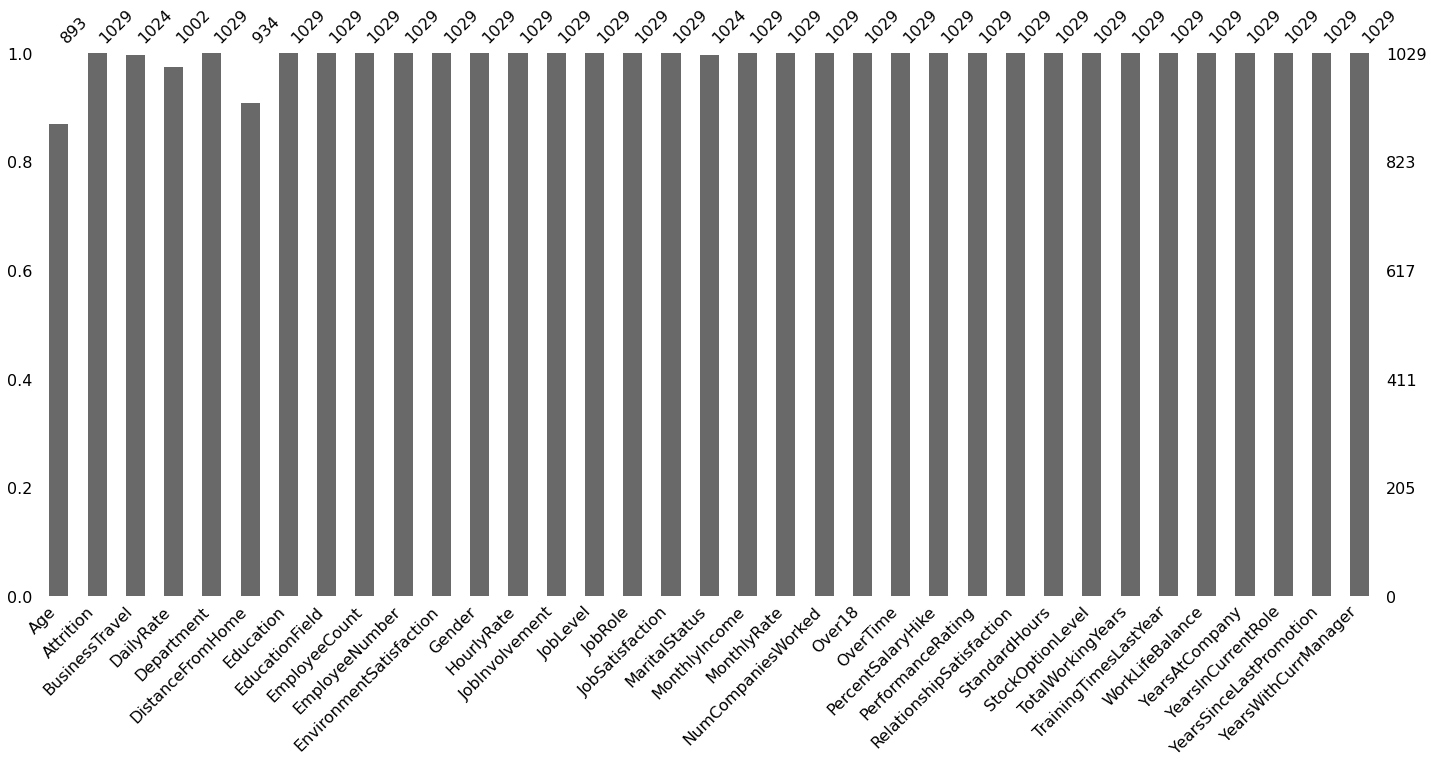

In [ ]:
import missingno as msno
msno.bar(hr_attrition_train_df)


The **BusinessTravel** and **MaritalStatus** has 5 features missing values, which can easily be filled. It will be much more tricky, to deal with the **‘Age’** feature, which has 136 missing values. The **DistanceFromHome** feature needs further investigation it is missing 95, and **DailyRate** feature is missing 27.


Describing data

In [ ]:
hr_attrition_train_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
#display both categorical and numerical columns
Categorical_columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
Numerical_columns=['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print('Categorical_columns  +++++',Categorical_columns)
print('Numerical_columns +++++++++',Numerical_columns)
#hr_attrition_train_df.columns.to_list()


Categorical_columns  +++++ ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical_columns +++++++++ ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


*We* can calculate categorical means for other categorical variables such as EducationField and marital status to get a more detailed sense of our data.


In [ ]:
hr_attrition_train_df.groupby('EducationField').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EducationField,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.882353,775.588235,11.933333,3.117647,1.0,1193.647059,2.705882,58.882353,2.882353,2.058824,2.470588,7227.117647,14732.352941,3.235294,15.000000,3.058824,3.000000,80.0,1.117647,11.705882,2.470588,2.823529,5.764706,3.823529,1.411765,3.117647
Life Sciences,37.768817,787.613365,9.658915,2.927230,1.0,1015.157277,2.671362,67.572770,2.704225,2.028169,2.767606,6363.431925,14482.492958,2.579812,15.319249,3.169014,2.643192,80.0,0.812207,11.082160,2.734742,2.727700,7.030516,4.260563,2.035211,4.079812
Marketing,38.919192,708.000000,10.528846,3.118182,1.0,983.563636,2.527273,67.400000,2.727273,2.263636,2.654545,7040.500000,14003.063636,2.572727,15.209091,3.154545,2.672727,80.0,0.890909,11.463636,2.672727,2.763636,7.254545,4.436364,2.181818,4.418182
Medical,38.160142,839.388013,10.098305,2.722561,1.0,1019.896341,2.682927,66.076220,2.737805,2.051829,2.685976,6603.942073,14167.301829,2.713415,15.240854,3.149390,2.762195,80.0,0.856707,11.591463,2.914634,2.740854,7.121951,4.137195,2.295732,3.911585
Other,36.215686,773.396825,9.355932,3.030303,1.0,1061.303030,3.000000,63.969697,2.681818,1.878788,2.787879,5626.015152,13517.909091,2.530303,15.818182,3.196970,2.575758,80.0,0.636364,9.848485,2.696970,2.833333,5.590909,3.803030,1.560606,3.606061
Technical Degree,37.739726,861.543210,9.891892,2.926829,1.0,1080.012195,2.695122,67.292683,2.634146,1.926829,2.597561,5991.378049,14201.365854,2.878049,14.707317,3.146341,2.695122,80.0,0.731707,10.829268,2.780488,2.780488,6.682927,4.414634,2.365854,3.951220


In [ ]:
hr_attrition_train_df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,38.656417,806.886610,9.678756,2.902696,1.0,1019.83939,2.724502,66.750293,2.754982,2.135991,2.763189,6823.22626,14241.103165,2.582649,15.279015,3.162954,2.708089,80.0,0.885111,11.907386,2.812427,2.765533,7.368113,4.528722,2.191090,4.262603
Yes,34.186207,770.063584,11.129630,2.840909,1.0,1046.31250,2.482955,66.340909,2.511364,1.596591,2.465909,4639.93750,14296.801136,2.994318,15.170455,3.142045,2.602273,80.0,0.517045,7.750000,2.636364,2.664773,4.880682,2.698864,1.772727,2.761364


In [ ]:
hr_attrition_train_df.groupby('MaritalStatus').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,,,,,,
Divorced,38.019608,850.635135,9.946602,2.882609,1.0,985.382609,2.713043,66.491304,2.739130,2.065217,2.734783,6504.747826,14188.239130,2.826087,15.034783,3.152174,2.713043,80.0,1.530435,11.573913,2.886957,2.760870,7.517391,4.395652,1.969565,4.173913
Married,39.095588,814.093074,10.071594,2.907173,1.0,1054.419831,2.654008,67.234177,2.746835,2.105485,2.677215,6732.900844,14237.147679,2.624473,15.371308,3.160338,2.658228,80.0,1.029536,11.632911,2.727848,2.751055,7.103376,4.451477,2.322785,4.061181
Single,36.068841,747.891374,9.810345,2.884375,1.0,1011.378125,2.709375,66.118750,2.650000,1.925000,2.753125,5941.631250,14389.646875,2.559375,15.234375,3.159375,2.734375,80.0,0.000000,10.265625,2.803125,2.740625,6.253125,3.690625,1.931250,3.775000


In [ ]:
hr_attrition_train_df.groupby('BusinessTravel').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.877778,805.882353,10.885417,2.852941,1.0,1058.166667,2.686275,64.254902,2.637255,2.049020,2.754902,6290.274510,14673.598039,2.676471,15.588235,3.176471,2.745098,80.0,0.911765,10.500000,2.647059,2.843137,7.235294,4.303922,2.127451,4.294118
Travel_Frequently,36.982955,793.086294,10.050847,2.909548,1.0,984.944724,2.698492,66.462312,2.718593,2.005025,2.738693,6181.160804,14202.165829,2.422111,15.321608,3.165829,2.683417,80.0,0.809045,11.055276,2.758794,2.804020,7.020101,4.170854,2.155779,4.015075
Travel_Rarely,38.382637,800.183381,9.741248,2.897649,1.0,1028.742739,2.676349,67.078838,2.723375,2.058091,2.701245,6565.944675,14194.062241,2.715076,15.197787,3.154910,2.684647,80.0,0.810512,11.360996,2.796680,2.720609,6.890733,4.228216,2.117566,3.965422


In [ ]:
hr_attrition_train_df.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,39.972222,811.560976,10.351351,2.976190,1.0,1256.452381,2.738095,68.404762,2.904762,2.000000,2.547619,6741.023810,12233.785714,2.904762,15.142857,3.119048,2.904762,80.0,0.833333,12.095238,2.523810,2.904762,7.000000,3.404762,1.833333,3.547619
Research & Development,37.976150,801.984825,9.885113,2.871302,1.0,1007.640533,2.720414,66.931953,2.711538,1.961538,2.711538,6230.458580,14421.819527,2.683432,15.306213,3.167160,2.686391,80.0,0.834320,11.306213,2.767751,2.704142,6.852071,4.140533,2.082840,3.989645
Sales,37.559259,795.854305,9.974910,2.926045,1.0,1029.382637,2.594855,65.900322,2.691318,2.228296,2.736334,6887.228296,14150.897106,2.553055,15.176849,3.147910,2.668810,80.0,0.794212,10.836013,2.848875,2.823151,7.131833,4.488746,2.237942,4.102894


In [ ]:
hr_attrition_train_df.groupby('OverTime').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,,,,,,
No,38.010937,796.970381,9.701937,2.917921,1.0,1033.309166,2.622435,66.813953,2.715458,2.058824,2.700410,6487.005472,14225.837209,2.711354,15.311902,3.161423,2.666211,80.0,0.848153,11.294118,2.841313,2.761970,6.968536,4.280438,2.165527,4.099863
Yes,37.727273,809.139932,10.513308,2.828859,1.0,1002.432886,2.832215,66.352349,2.708054,2.006711,2.741611,6358.523490,14311.446309,2.510067,15.134228,3.154362,2.748322,80.0,0.758389,10.956376,2.637584,2.714765,6.879195,4.057047,2.006711,3.775168


In [ ]:
hr_attrition_train_df.groupby('JobRole').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,40.560000,873.941176,11.259259,2.966292,1.0,1039.662921,2.651685,66.932584,2.696629,2.449438,2.674157,7338.505618,14788.842697,2.808989,15.685393,3.146067,2.573034,80.0,0.786517,13.617978,2.730337,2.685393,7.910112,4.831461,2.764045,4.168539
Human Resources,36.607143,817.515152,9.193548,2.852941,1.0,1298.323529,2.647059,68.500000,2.852941,1.382353,2.558824,4085.735294,11787.352941,2.823529,15.411765,3.117647,3.000000,80.0,0.852941,7.970588,2.500000,2.882353,5.264706,3.029412,1.529412,3.117647
Laboratory Technician,34.951724,787.931429,9.898204,2.765363,1.0,1024.391061,2.737430,67.720670,2.664804,1.223464,2.631285,3112.502793,14134.916201,2.480447,15.044693,3.162011,2.642458,80.0,0.905028,7.340782,2.966480,2.675978,4.821229,3.016760,1.351955,3.229050
Manager,46.972222,813.638889,8.276923,2.931507,1.0,959.602740,2.767123,66.506849,2.753425,4.232877,2.726027,17069.438356,14896.972603,3.356164,15.219178,3.191781,2.835616,80.0,0.712329,24.424658,2.808219,2.767123,13.657534,6.835616,4.575342,5.767123
Manufacturing Director,39.035714,795.725275,10.307692,2.789474,1.0,988.684211,2.905263,65.252632,2.621053,2.473684,2.800000,7387.263158,15382.884211,2.694737,15.726316,3.210526,2.747368,80.0,0.821053,13.326316,2.800000,2.768421,7.905263,5.094737,2.052632,4.905263
Research Director,44.387097,818.645161,9.456140,3.193548,1.0,983.129032,2.467742,65.145161,2.790323,3.983871,2.580645,15939.516129,14991.080645,3.693548,14.870968,3.112903,2.693548,80.0,0.919355,21.451613,2.790323,2.838710,11.838710,6.532258,3.403226,6.209677
Research Scientist,35.016216,776.304762,9.857143,2.883178,1.0,1001.112150,2.705607,67.962617,2.775701,1.168224,2.789720,3147.130841,13763.397196,2.387850,15.369159,3.172897,2.696262,80.0,0.803738,7.714953,2.560748,2.658879,5.182243,3.238318,1.495327,3.219626
Sales Executive,38.413978,784.086124,10.350515,3.032258,1.0,1036.884793,2.580645,66.225806,2.718894,2.327189,2.751152,6929.493088,14098.207373,2.700461,14.976959,3.142857,2.658986,80.0,0.866359,11.004608,2.820276,2.806452,7.488479,4.870968,2.391705,4.645161
Sales Representative,30.375000,835.876923,9.135593,2.545455,1.0,1058.530303,2.651515,63.606061,2.590909,1.106061,2.666667,2641.909091,14148.378788,1.712121,15.515152,3.136364,2.651515,80.0,0.575758,4.636364,3.030303,2.924242,2.757576,1.924242,0.939394,1.484848


In [ ]:
hr_attrition_train_df.groupby('Over18').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Over18,,,,,,,,,,,,,,,,,,,,,,,,,,
Y,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.79689,14250.629738,2.653061,15.260447,3.159378,2.68999,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831


In [ ]:
hr_attrition_train_df.groupby('Gender').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,37.789189,805.651741,10.258856,2.905340,1.0,1001.582524,2.730583,66.385922,2.679612,2.152913,2.689320,6935.356796,14763.723301,2.733010,15.206311,3.162621,2.635922,80.0,0.793689,11.837379,2.847087,2.745146,7.410194,4.563107,2.230583,4.245146
Male,38.030593,797.096667,9.717813,2.883306,1.0,1039.581848,2.651540,66.876823,2.735818,1.970827,2.727715,6125.565640,13908.012966,2.599676,15.296596,3.157212,2.726094,80.0,0.841167,10.768233,2.739060,2.750405,6.630470,3.983793,2.045381,3.846029


# VISUALIZE DATA

In [ ]:
#visualize the data for you to get the first impression of the data


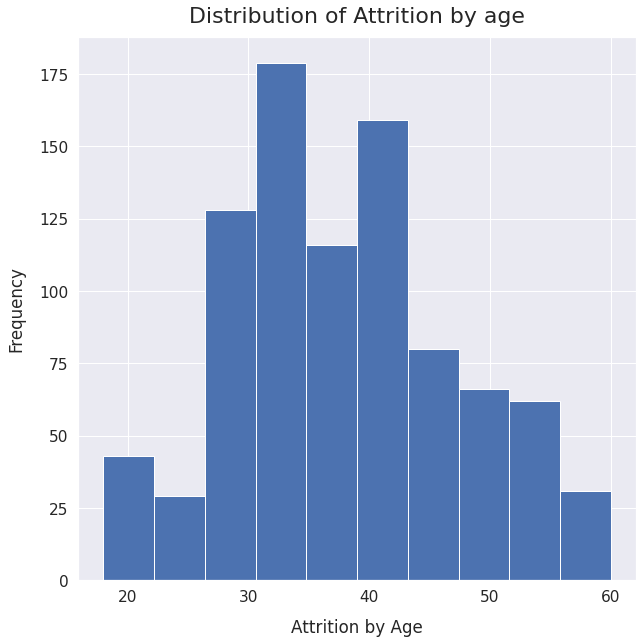

In [ ]:
sns.set(font_scale=1.4)
hr_attrition_train_df['Age'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Attrition by Age", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Attrition by age", y=1.015, fontsize=22);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

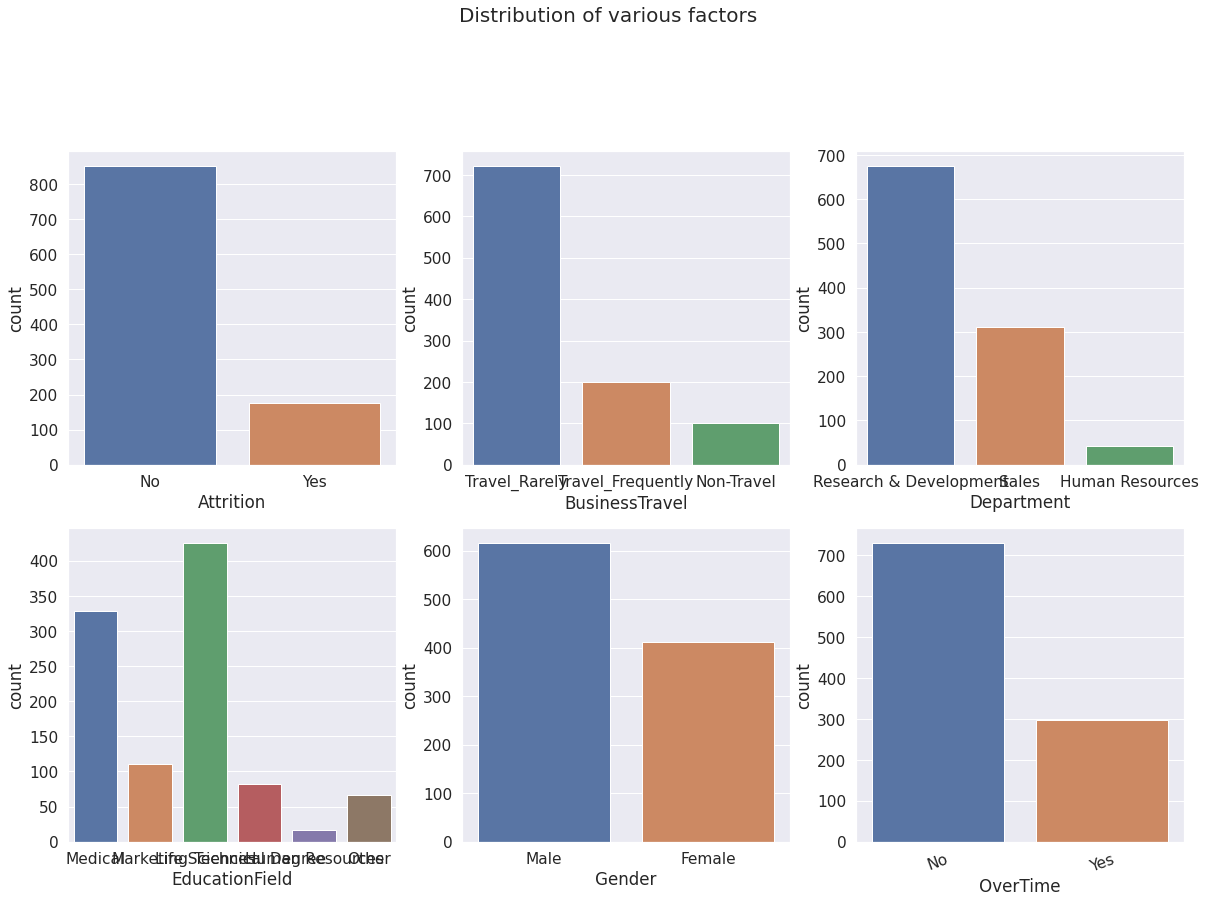

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(train_data['Attrition'], ax = ax[0,0]) 
sns.countplot(train_data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(train_data['Department'], ax = ax[0,2]) 
sns.countplot(train_data['EducationField'], ax = ax[1,0])
sns.countplot(train_data['Gender'], ax = ax[1,1])  
sns.countplot(train_data['OverTime'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

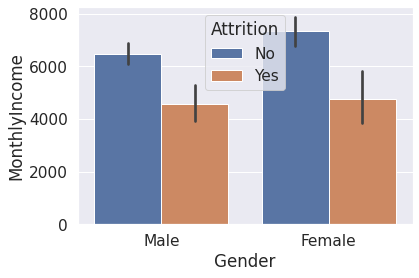

In [ ]:
#Data Visualization
#draw a bar plot of Attrition by Gender
sns.barplot(x="Gender", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)



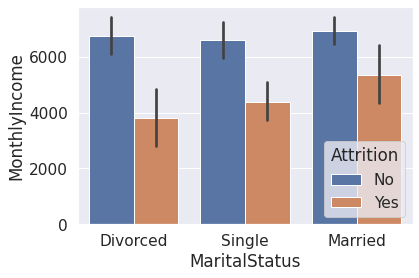

In [ ]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


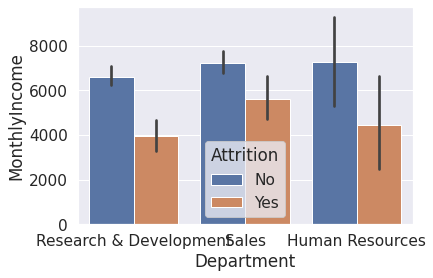

In [ ]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


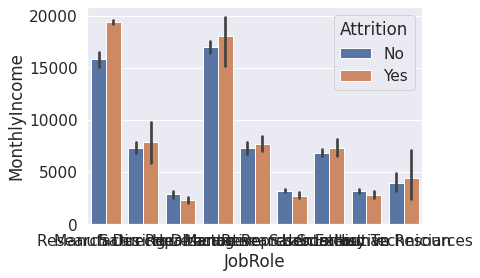

In [ ]:
#jobRole
#draw a bar plot of Attrition by Gender
sns.barplot(x="JobRole", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


#more employees from the sales department are more likely leave the company

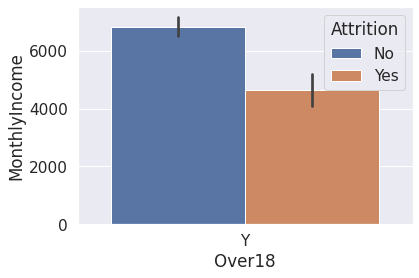

In [ ]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="Over18", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


'''Plots above convey following things about the dataset:
Attrition status: About employees who leave through attrition.
Gender: There are more Men than Women who are employed,at the same time more men than women leave through attrition(approx.)
Martial Status: Married people are more likely to be leave employement through attrition. Over18: Majority of the population over18 are employed are also likely to stay on the job.)'''

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2342     3
2451     3
2610     3
2404     3
6347     3
        ..
5347     1
5343     1
19033    1
3291     1
14336    1
Name: MonthlyIncome, Length: 963, dtype: int64

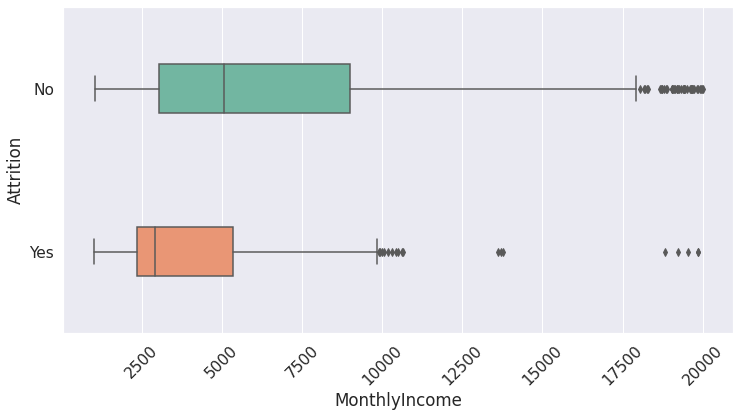

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'Attrition', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2342     3
2451     3
2610     3
2404     3
6347     3
        ..
5347     1
5343     1
19033    1
3291     1
14336    1
Name: MonthlyIncome, Length: 963, dtype: int64

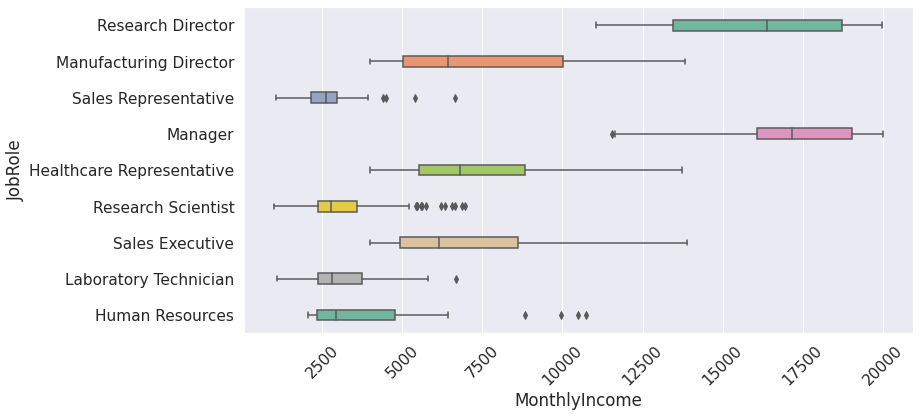

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'JobRole', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

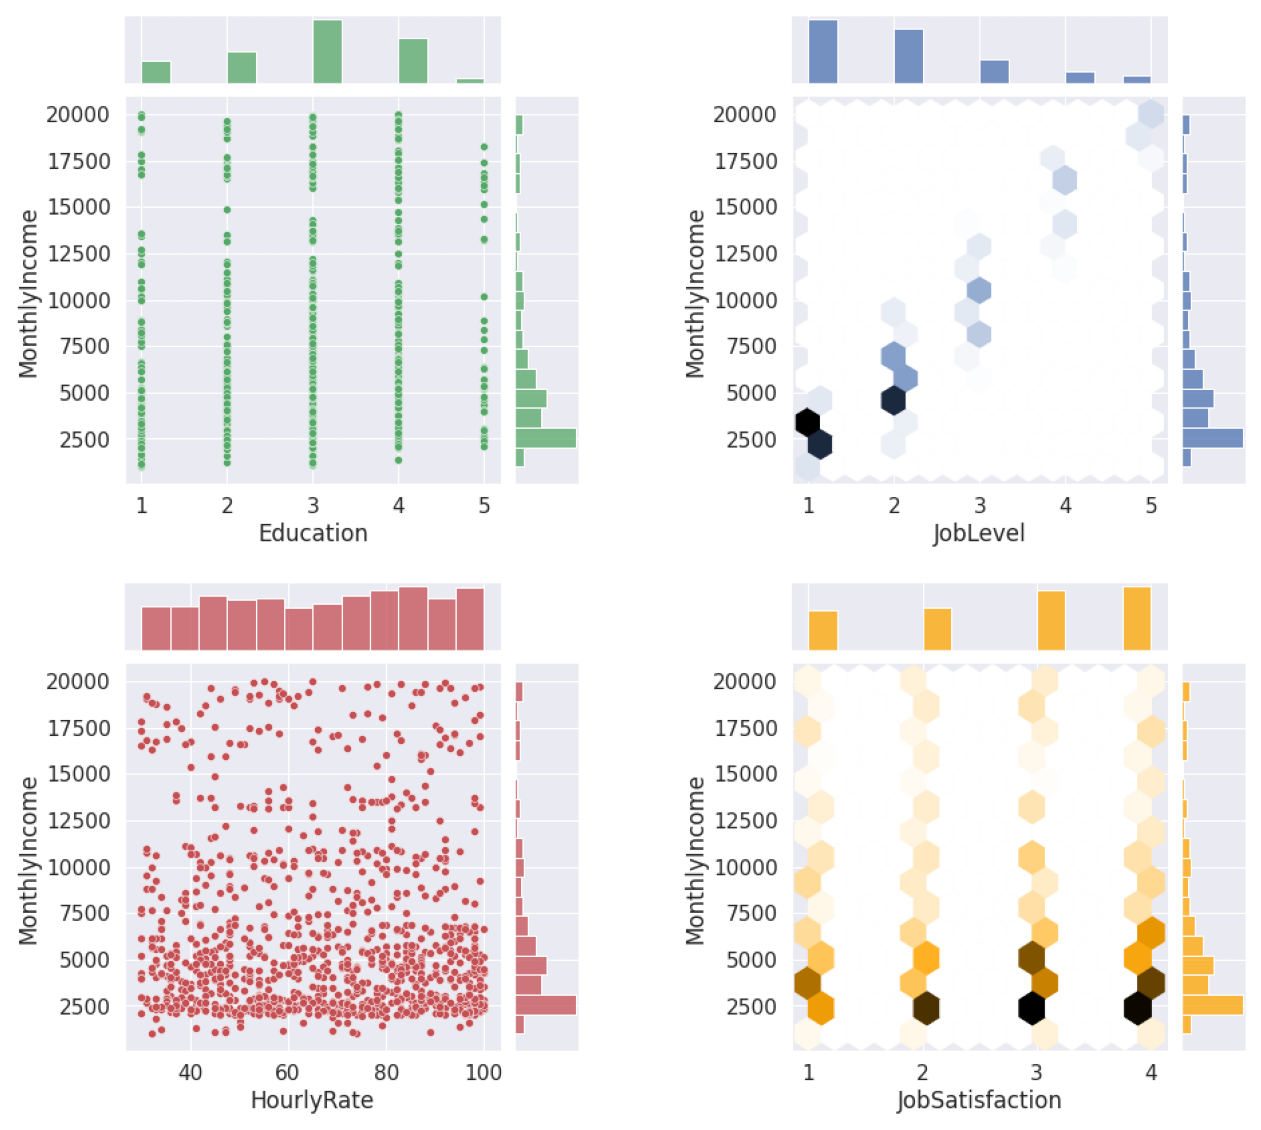

In [ ]:
import matplotlib.image as mpimg
JG1 = sns.jointplot('Education', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='g')
JG2 = sns.jointplot('JobLevel', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='b')
JG3 = sns.jointplot('HourlyRate', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='r')
JG4 = sns.jointplot('JobSatisfaction', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='orange')
JG1.savefig('JG1.png')
plt.close(JG1.fig)
JG2.savefig('JG2.png')
plt.close(JG2.fig)
JG3.savefig('JG3.png')
plt.close(JG3.fig)
JG4.savefig('JG4.png')
plt.close(JG4.fig)
f, ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].imshow(mpimg.imread('JG1.png'))
ax[0,1].imshow(mpimg.imread('JG2.png'))
ax[1,0].imshow(mpimg.imread('JG3.png'))
ax[1,1].imshow(mpimg.imread('JG4.png'))
[ax.set_axis_off() for ax in ax.ravel()]
plt.tight_layout()


In [ ]:
hr_attrition_train_df.boxplot(by ='Attrition', column =['DailyRate'], grid = False)


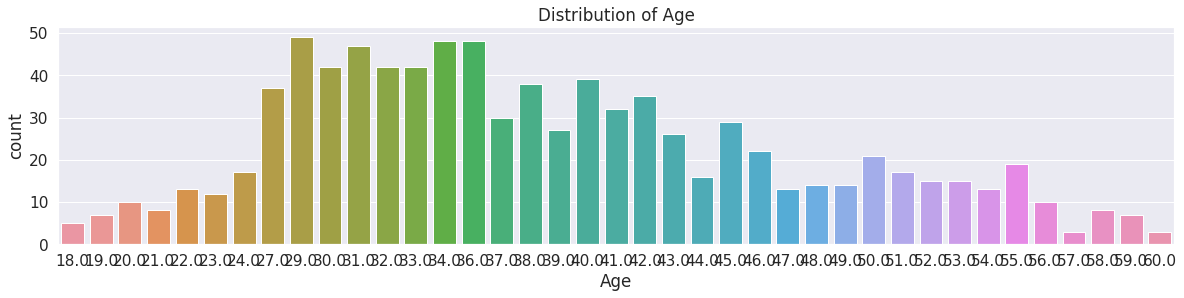

In [ ]:
# See the distribution of gender to recognize different distributions
plt.subplots(figsize=(20,4))
sns.countplot(x='Age', data=hr_attrition_train_df);
plt.title('Distribution of Age');


#What Features Are Linked To Employee Attrition?


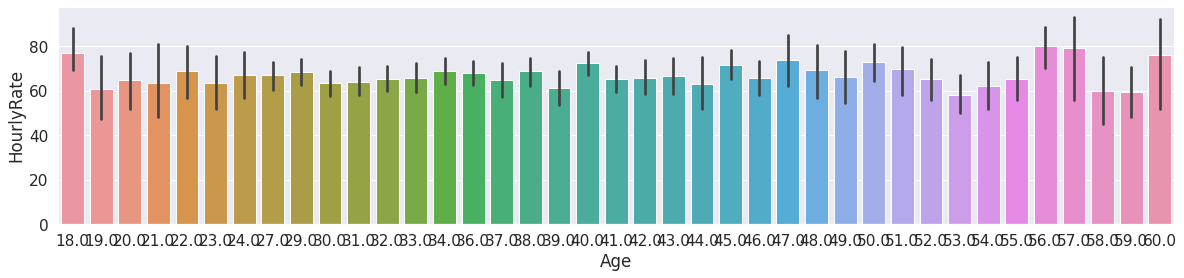

In [ ]:
plt.subplots(figsize=(20,4))
sns.barplot(data=hr_attrition_train_df, x="Age", y="HourlyRate")


In [ ]:
hr_attrition_train_df['Attrition'].value_counts()

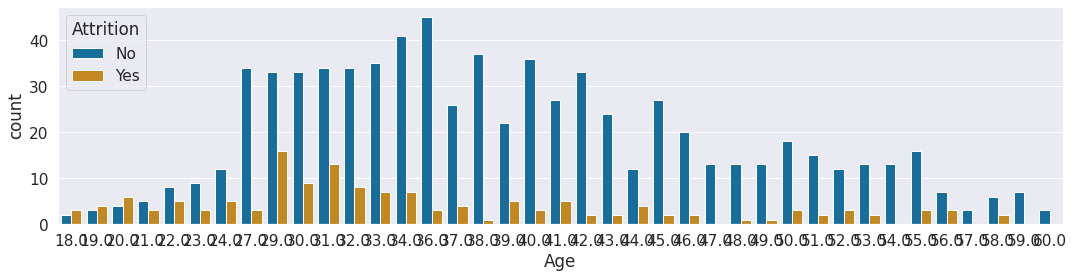

In [ ]:
#visualize number of number of employees who have left the company
plt.subplots(figsize=(18,4))
sns.countplot(x="Age", hue="Attrition",data=hr_attrition_train_df,palette='colorblind')


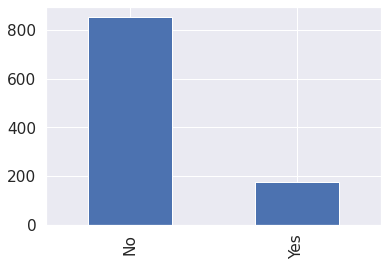

In [ ]:
#visualizing categorical variables
hr_attrition_train_df['Attrition'].value_counts().plot.bar()


*We access the Age column, call the plot method and pass in hist to the kind argument to output a histogram plot.*


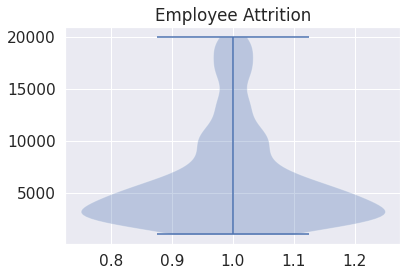

In [ ]:
# boxplot
plt.title('Employee Attrition')
plt.violinplot(hr_attrition_train_df['MonthlyIncome'])
plt.show()

shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


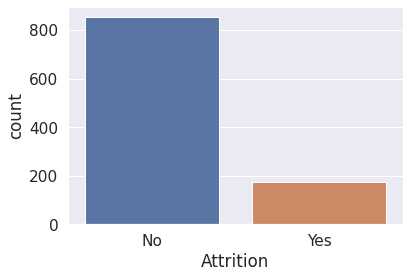

In [ ]:
sns.countplot(hr_attrition_train_df['Attrition'])

# DATA CLEANING

In [ ]:
df500_test_data=test_data.copy()
df500_test_data



,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
df500_train_data=train_data.copy()

df500_train_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [ ]:

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Gender']=number.fit_transform(df500_train_data['Gender'].astype('str')) 
df500_test_data['Gender']=number.fit_transform(df500_test_data['Gender'].astype('str')) 
df500_test_data




,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,1,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,0,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,1,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,1,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,1,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,1,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,1,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,1,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,0,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['EducationField']=number.fit_transform(df500_train_data['EducationField'].astype('str')) 
df500_test_data['EducationField']=number.fit_transform(df500_test_data['EducationField'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,3,1,1469,4,1,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,3,1,250,4,0,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,0,1,1714,4,1,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,1,1,86,2,1,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,1,1,304,4,1,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,3,1,1477,4,1,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,2,1,449,3,1,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,3,1,440,1,1,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,1,1,909,4,0,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Department']=number.fit_transform(df500_train_data['Department'].astype('str')) 
df500_test_data['Department']=number.fit_transform(df500_test_data['Department'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,2,1.0,1,2,1,449,3,1,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['BusinessTravel']=number.fit_transform(df500_train_data['BusinessTravel'].astype('str')) 
df500_test_data['BusinessTravel']=number.fit_transform(df500_test_data['BusinessTravel'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,1,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['JobRole']=number.fit_transform(df500_train_data['JobRole'].astype('str')) 
df500_test_data['JobRole']=number.fit_transform(df500_test_data['JobRole'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,7,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,2,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['OverTime']=number.fit_transform(df500_train_data['OverTime'].astype('str')) 
df500_test_data['OverTime']=number.fit_transform(df500_test_data['OverTime'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,7,1,Single,8463,23490,0,Y,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,Divorced,4450,26250,1,Y,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,Married,1555,11585,1,Y,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,Divorced,9724,18787,2,Y,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,2,2,Single,5914,9945,8,Y,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,Married,4373,17456,0,Y,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,Married,6349,22107,0,Y,1,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,Married,3464,24737,5,Y,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,Married,5204,7790,8,Y,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Over18']=number.fit_transform(df500_train_data['Over18'].astype('str')) 
df500_test_data['Over18']=number.fit_transform(df500_test_data['Over18'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,7,1,Single,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,Divorced,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,Married,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,Divorced,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,2,2,Single,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,Married,4373,17456,0,0,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,Married,6349,22107,0,0,1,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,Married,3464,24737,5,0,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,Married,5204,7790,8,0,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['MaritalStatus']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
df500_test_data


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,2,866.0,2,NaN,3,3,1,1469,4,1,84,3,2,7,1,2,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,0,57,4,2,4,1,0,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,1,58,1,1,1,3,1,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,1,59,3,3,6,1,0,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,NaN,2,1,1,304,4,1,62,3,2,2,2,2,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,1,430.0,2,7.0,3,3,1,1477,4,1,54,3,2,7,1,1,4373,17456,0,0,0,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,0,210.0,2,1.0,1,2,1,449,3,1,73,3,2,7,2,1,6349,22107,0,0,1,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,2,1157.0,1,2.0,4,3,1,440,1,1,84,1,1,6,4,1,3464,24737,5,0,1,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,2,1383.0,0,2.0,3,1,1,909,4,0,42,2,2,1,4,1,5204,7790,8,0,0,11,3,3,80,2,13,2,3,5,4,0,4


In [ ]:
#impute missing data
#imputation with median
missing_rate = ['MaritalStatus']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['MaritalStatus']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()



count of NULL values after imputation

count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#imputation with median
missing_rate = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()


#imputation with median
missing_rate = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome            95
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [ ]:
#imputation with median
missing_rate = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#imputation with median
missing_rate = ['BusinessTravel']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()

#imputation with median
missing_rate = ['BusinessTravel']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

# Predictive Modeling




**Define Training and Testing set**


In [ ]:
##First, we train these classifiers with our training data.
##After that, using the trained classifier, we predict the attrition outcome of test data.
##Finally, we calculate the accuracy score (in percentange) of the trained classifier.



In [ ]:
X_train = df500_train_data.drop('Attrition', axis=1)
y_train = df500_train_data['Attrition']
X_test =df500_test_data.copy()
y_test=df500_test_data.copy()
X_train.shape, y_train.shape, X_test.shape


In [ ]:

from sklearn.linear_model import LogisticRegression
#LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)

print (str(acc_log_reg) + ' percent')


82.99 percent


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [98]:
#initialize 
clf = SVC()

#fit the data
clf.fit(X_train, y_train)

y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)

print (acc_svc)


82.9


In [ ]:
#K-Nearest Neighbors 
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)


print (acc_knn)


85.52


In [ ]:
#Linear SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)


print (acc_linear_svc)


31.2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)


print (acc_decision_tree)


100.0


In [ ]:
#random forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print (acc_random_forest)


100.0


In [ ]:
#Perceptron
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)


print (acc_perceptron)


66.76


In [ ]:
#Stochastic Gradient Descent (SGD)
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)

print (acc_sgd)


82.51


Accuracy: 100 % 

Confusion Matrix in Numbers
[[853   0]
 [  0 176]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



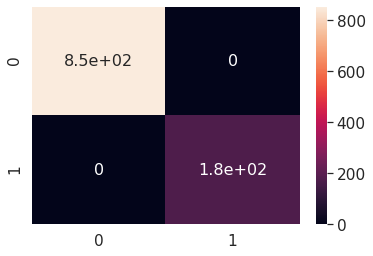

In [84]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Attrition', 'No Attrition']


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)


print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()



Predictive model evaluation
results and discussions
Conclusion

Accuracy: 100 % 

Confusion Matrix in Numbers
[[853   0]
 [  0 176]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



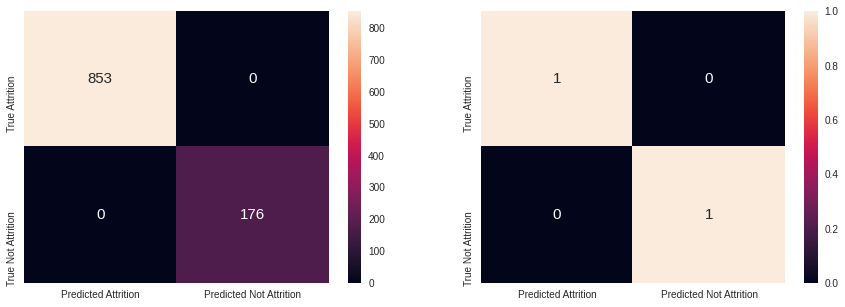

In [103]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Attrition', 'Not Attrition']


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)


print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Attrition', 'True Not Attrition']
predicted_class_names = ['Predicted Attrition', 'Predicted Not Attrition']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
